In [1]:
!date

Fri Nov 15 11:30:52 EST 2024


In [2]:
pwd

'/mmfs1/data/aglinska/BC-ABCD-denoise/Code'

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
import ants

/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
subs = [sub for sub in os.listdir('../Data/020-fmriprepped/') if all((sub.startswith('sub-'),not sub.endswith('.html')))]
subs.sort()
subs = np.array(subs)
n_subs = len(subs)
print(n_subs)

34


In [7]:
list(np.sort(np.array(os.listdir('../Data/050-Data-DeepCor-ed/'))))

['001-linear-16-256',
 'linear-200-epochs',
 'linear-200-epochs-fgreg-50',
 'linear-large-csf-wm-noreg',
 'linear-newtest',
 'linear-newtest-v2',
 'linear-newtest-v3',
 'test']

In [8]:
#indir = '../Data/050-Data-DeepCor-ed/linear-200-epochs-fgreg-50'
indir = '../Data/050-Data-DeepCor-ed/linear-newtest-v3/'
#os.listdir(indir)[0:10]

In [9]:
# sub = 0
# os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=0)),
# os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=1)),
# os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=2)),
# os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=3)),
# os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=4)),)

In [10]:
ffa = ants.image_read('../Misc/ffa_mask_resampled.nii')

In [11]:
# subs = subs[check_done.mean(axis=0)==1]
# n_subs = len(subs)

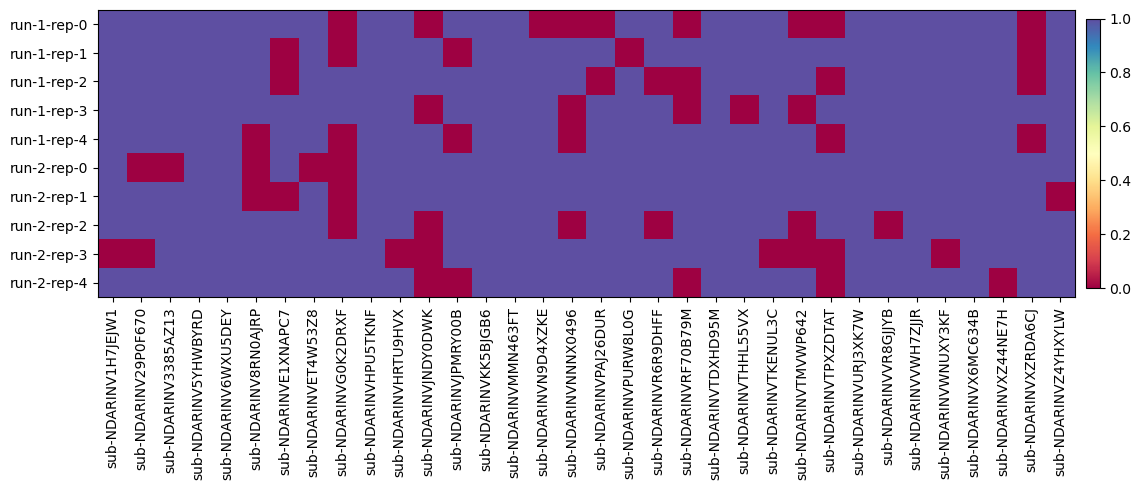

In [13]:
check_done = np.array(([os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=0))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=1))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=2))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=3))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=4))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=0))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=1))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=2))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=3))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=4))) for sub in subs],))

plt.figure(figsize=(15,5))
plt.imshow(check_done,vmin=0,vmax=1,cmap='Spectral')
plt.colorbar(shrink=.7,pad=0.01)

ys = np.hstack([['run-{r}-rep-{rep}'.format(r=r,rep=rep) for rep in np.arange(5)] for r in [1,2]]);
plt.yticks(np.arange(len(ys)),labels=ys);

plt.xticks(np.arange(len(subs)),labels=subs,rotation=90);

In [28]:
preproc_1 = [ants.image_read('../Data/060-Corr2Reg-baseline/corrDiff-preproc-{sub}-run-{r}.nii'.format(sub=sub,r=1)) for sub in subs]
preproc_2 = [ants.image_read('../Data/060-Corr2Reg-baseline/corrDiff-preproc-{sub}-run-{r}.nii'.format(sub=sub,r=2)) for sub in subs]

compcor_1 = [ants.image_read('../Data/060-Corr2Reg-baseline/corrDiff-COMPCORR-{sub}-run-{r}.nii'.format(sub=sub,r=1)) for sub in subs]
compcor_2 = [ants.image_read('../Data/060-Corr2Reg-baseline/corrDiff-COMPCORR-{sub}-run-{r}.nii'.format(sub=sub,r=2)) for sub in subs]

deepcor_1 = [ants.image_read('../Data/060-Corr2Reg-baseline/corrDiff-deepcor-FG-{sub}-run-{r}.nii'.format(sub=sub,r=1)) for sub in subs]
deepcor_2 = [ants.image_read('../Data/060-Corr2Reg-baseline/corrDiff-deepcor-FG-{sub}-run-{r}.nii'.format(sub=sub,r=2)) for sub in subs]

In [33]:
fgs1_0 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=0))) for sub in subs]
tgs1_0 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=0))) for sub in subs]

fgs1_1 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=1))) for sub in subs]
tgs1_1 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=1))) for sub in subs]

fgs1_2 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=2))) for sub in subs]
tgs1_2 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=2))) for sub in subs]

fgs1_3 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=3))) for sub in subs]
tgs1_3 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=3))) for sub in subs]

fgs1_4 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=4))) for sub in subs]
tgs1_4 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=4))) for sub in subs]

fgs2_0 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=0))) for sub in subs]
tgs2_0 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=0))) for sub in subs]

fgs2_1 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=1))) for sub in subs]
tgs2_1 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=1))) for sub in subs]

fgs2_2 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=2))) for sub in subs]
tgs2_2 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=2))) for sub in subs]

fgs2_3 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=3))) for sub in subs]
tgs2_3 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=3))) for sub in subs]

fgs2_4 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=4))) for sub in subs]
tgs2_4 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=4))) for sub in subs]

In [34]:
cmat1 = np.array([np.corrcoef(np.vstack((fgs1_0[s][ffa],fgs1_1[s][ffa],fgs1_2[s][ffa],fgs1_3[s][ffa],fgs1_4[s][ffa]))) for s in range(n_subs)]).mean(axis=0)
cmat2 = np.array([np.corrcoef(np.vstack((fgs2_0[s][ffa],fgs2_1[s][ffa],fgs2_2[s][ffa],fgs2_3[s][ffa],fgs2_4[s][ffa]))) for s in range(n_subs)]).mean(axis=0)

<AxesSubplot:>

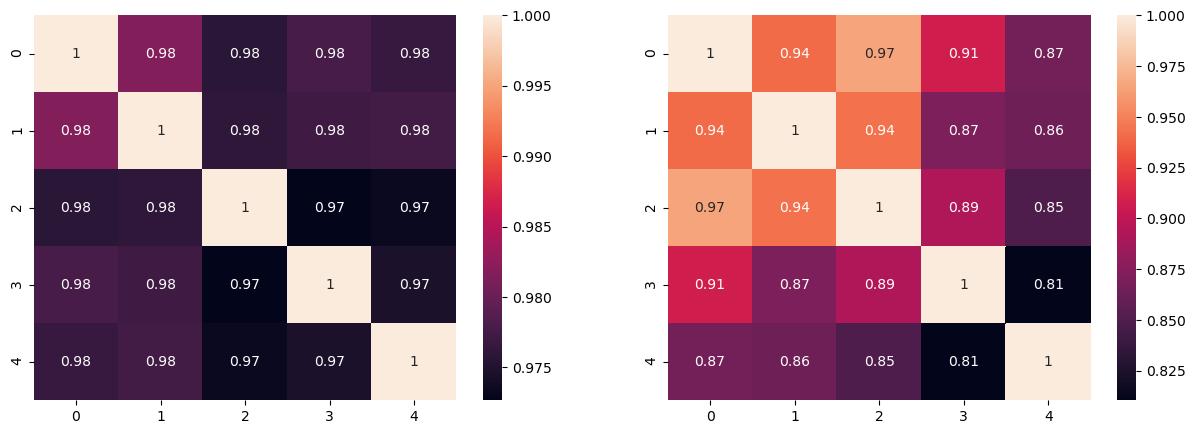

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1);sns.heatmap(cmat1,annot=True)
plt.subplot(1,2,2);sns.heatmap(cmat2,annot=True)

In [36]:
#ffa.numpy()==1

In [37]:
avg_preproc = [val[ffa.numpy()==1].mean() for val in preproc_1+preproc_2]
avg_compcorr = [val[ffa.numpy()==1].mean() for val in compcor_1+compcor_2]
avg_deepcor = [val[ffa.numpy()==1].mean() for val in deepcor_1+deepcor_2]

In [38]:
(np.array(avg_preproc).mean(),np.array(avg_compcorr).mean(),np.array(avg_deepcor).mean())

(0.051513337, 0.06557241, 0.050108884)

<BarContainer object of 2 artists>

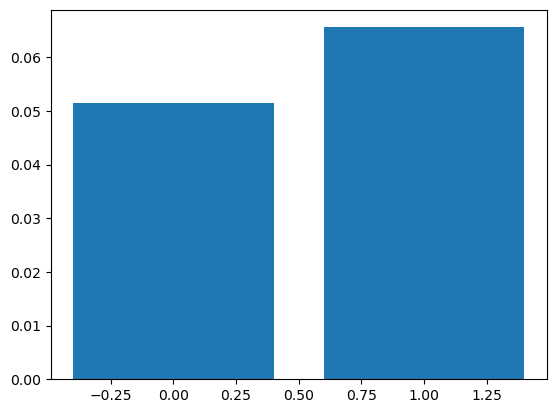

In [39]:
plt.bar([0,1],(np.array(avg_preproc).mean(),np.array(avg_compcorr).mean()))

In [40]:
#mean_fgs = fgs[0].new_image_like(np.array([im.numpy() for im in fgs1_0+fgs2_0]).mean(axis=0))
#mean_tgs = tgs[0].new_image_like(np.array([im.numpy() for im in tgs1_0+tgs2_0]).mean(axis=0))

mean_fgs = fgs1_0[0].new_image_like(np.array([im.numpy() for im in fgs1_0+fgs1_1+fgs1_2+fgs1_3+fgs1_4+fgs2_0+fgs2_1+fgs2_2+fgs2_3+fgs2_4]).mean(axis=0))
mean_tgs = tgs1_0[0].new_image_like(np.array([im.numpy() for im in tgs1_0+tgs1_1+tgs1_2+tgs1_3+tgs1_4+tgs2_0+tgs2_1+tgs2_2+tgs2_3+tgs2_4]).mean(axis=0))

In [41]:
(mean_tgs[ffa.numpy()==1].mean(),mean_fgs[ffa.numpy()==1].mean())

(0.052401323, 0.06374199)

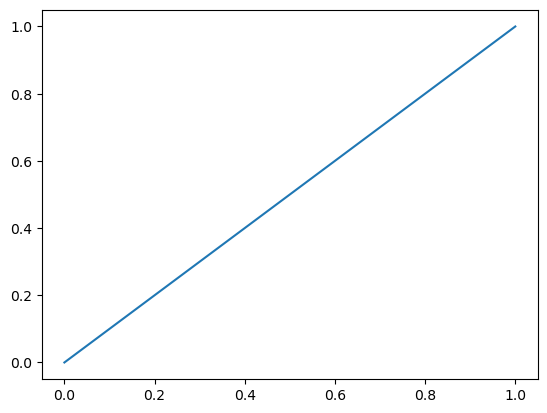

In [42]:
plt.plot([0,1],[0,1])

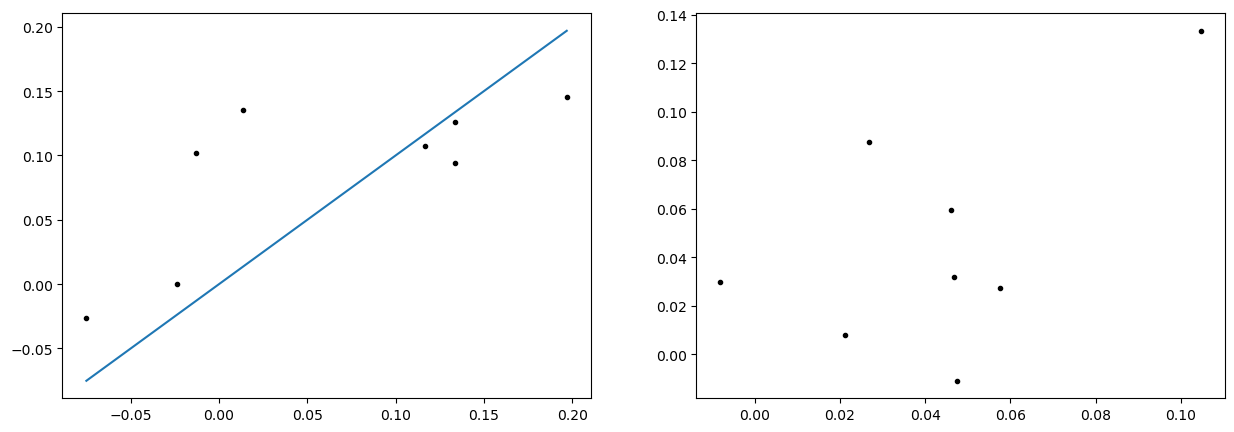

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

vec1 = np.array([val[ffa.numpy()==1].mean() for val in preproc_1])
vec2 = np.array([val[ffa.numpy()==1].mean() for val in compcor_1])
plt.plot(vec1,vec2,'k.')
plt.plot([vec1.min(),vec1.max()],[vec1.min(),vec1.max()])
# plt.xlim(-.3,.3)
# plt.ylim(-.3,.3)

plt.subplot(1,2,2)
plt.plot([val[ffa.numpy()==1].mean() for val in preproc_2],[val[ffa.numpy()==1].mean() for val in compcor_2],'k.')
# plt.xlim(-.3,.3)
# plt.ylim(-.3,.3)

In [44]:
# mean_fgs = fgs[0].new_image_like(np.array([im.numpy() for im in fgs]).mean(axis=0))
# mean_tgs = tgs[0].new_image_like(np.array([im.numpy() for im in tgs]).mean(axis=0))

In [45]:
mean_deepcorr_ffx = fgs[0].new_image_like(np.array([im.numpy() for im in deepcor_1+deepcor_2]).mean(axis=0))
mean_deepcorr_ffx.to_file('../mean_deepcorr_ffx.nii')
#mean_tgs = tgs[0].new_image_like(np.array([im.numpy() for im in tgs]).mean(axis=0))

NameError: name 'fgs' is not defined

In [46]:
mean_fgs.to_file('../mean_fgs.nii')
mean_tgs.to_file('../mean_tgs.nii')

In [47]:
#tgs = tgs1_0[0].new_image_like(np.array([np.array([s.numpy() for s in im]) for im in [tgs1_0,tgs1_1,tgs1_2,tgs1_3,tgs1_4,tgs2_0,tgs2_1,tgs2_2,tgs2_3,tgs2_4]]).mean(axis=0))
tgs = np.array([np.array([s.numpy() for s in im]) for im in [tgs1_0,tgs1_1,tgs1_2,tgs1_3,tgs1_4,tgs2_0,tgs2_1,tgs2_2,tgs2_3,tgs2_4]]).mean(axis=0)
fgs = np.array([np.array([s.numpy() for s in im]) for im in [fgs1_0,fgs1_1,fgs1_2,fgs1_3,fgs1_4,fgs2_0,fgs2_1,fgs2_2,fgs2_3,fgs2_4]]).mean(axis=0)

tgs = [tgs1_0[0].new_image_like(tgs[s,:,:,:]) for s in range(tgs.shape[0])]
fgs = [fgs1_0[0].new_image_like(fgs[s,:,:,:]) for s in range(fgs.shape[0])]

Text(0, 0.5, 'FG')

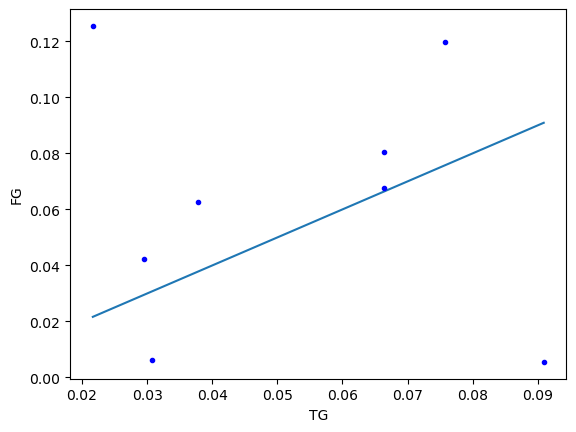

In [48]:
vec1=[im[ffa].mean() for im in tgs];vec1=np.array(vec1)
vec2=[im[ffa].mean() for im in fgs];vec2=np.array(vec2)

plt.plot([vec1.min(),vec1.max()],[vec1.min(),vec1.max()])
plt.plot(vec1,vec2,'b.')
#plt.plot((vec1.min(),vec2.min()),(vec1.max(),vec2.max()))

plt.xlabel('TG')
plt.ylabel('FG')

In [49]:
(vec1.mean(),vec2.mean())

(0.052401323, 0.06374199)

In [50]:

brain_mask = ants.image_read('../Data/020-fmriprepped/sub-NDARINVVR8GJJYB/ses-baselineYear1Arm1/anat/sub-NDARINVVR8GJJYB_ses-baselineYear1Arm1_run-01_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz')


In [51]:
ffa_map = ants.image_read('../Misc/ffa_map_resampled.nii')

In [52]:
corr2temp1 = [np.corrcoef(ffa_map[brain_mask],im[brain_mask])[0,1] for im in preproc_1+preproc_2];corr2temp1=np.array(corr2temp1)
corr2temp2 = [np.corrcoef(ffa_map[brain_mask],im[brain_mask])[0,1] for im in compcor_1+compcor_2];corr2temp2=np.array(corr2temp2)
corr2temp3 = [np.corrcoef(ffa_map[brain_mask],im[brain_mask])[0,1] for im in deepcor_1+deepcor_2];corr2temp3=np.array(corr2temp3)
#corr2temp3 = [np.corrcoef(ffa_map[brain_mask],im[brain_mask])[0,1] for im in fgs1_0+fgs1_1+fgs1_2+fgs1_3+fgs1_4+fgs2_0+fgs2_1+fgs2_2+fgs2_3+fgs2_4];corr2temp3=np.array(corr2temp3)

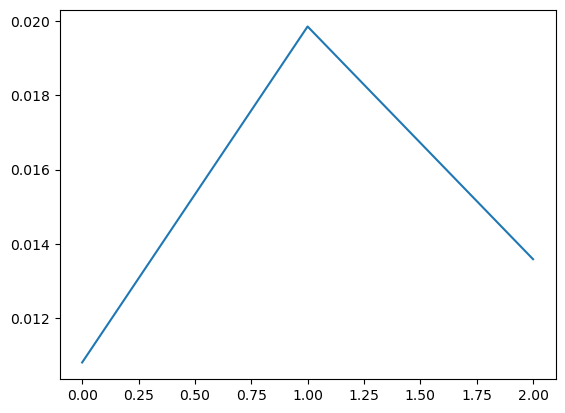

In [53]:
plt.plot([corr2temp1.mean(),corr2temp2.mean(),corr2temp3.mean()])